In [1]:
## BLURRING
'''
Blurring is basically used to remove noise from the image.
IMP -> Blurring image too much could cost us in lossing the image data.

Major blurring techniques:
1.Average Blurring
2.Guassian Blurring
3.Median Blurring
4.Bilateral Blurring

'''

'\nBlurring is basically used to remove noise from the image.\nIMP -> Blurring image too much could cost us in lossing the image data.\n\nMajor blurring techniques:\n1.Average Blurring\n2.Guassian Blurring\n3.Median Blurring\n4.Bilateral Blurring\n\n'

In [2]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import matplotlib

[]

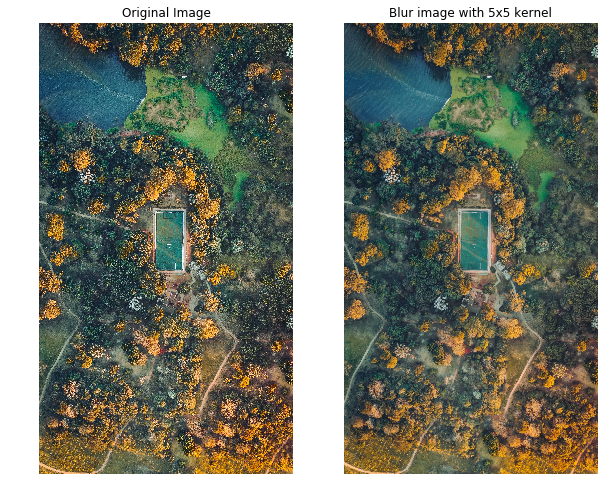

In [3]:
# Average Blurring -> Takes the mean of the kernel and replace the value in center with the mean

img = cv2.imread("images/image2.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(10,10))
ax1,ax2 = fig.subplots(1,2)

## lets take kernel of 5x5
img_blur = cv2.blur(img,ksize=(5,5))
ax1.imshow(img)
ax2.imshow(img_blur)
ax1.set_title("Original Image")
ax1.axis('off')
ax2.set_title("Blur image with 5x5 kernel")
ax2.axis('off')
plt.plot()

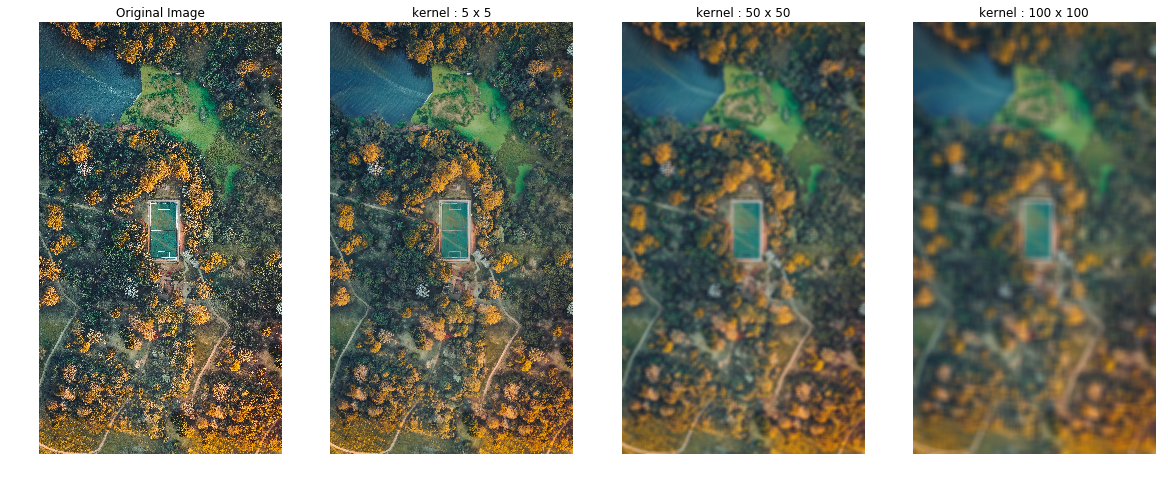

In [4]:
## lets blur image with different kernel sizes

img = cv2.imread("images/image2.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

kernels = [5,50,100]

fig ,ax = plt.subplots(nrows=1,ncols=4,figsize=(20,20))
ax[0].imshow(img)
ax[0].axis("off")
ax[0].set_title("Original Image")

for index,size in enumerate(kernels):
    img_blur = cv2.blur(img,ksize=(size,size))
    axi = ax[index+1]
    axi.imshow(img_blur)
    axi.axis('off')
    axi.set_title("kernel : {} x {}".format(size,size))
plt.show()

[]

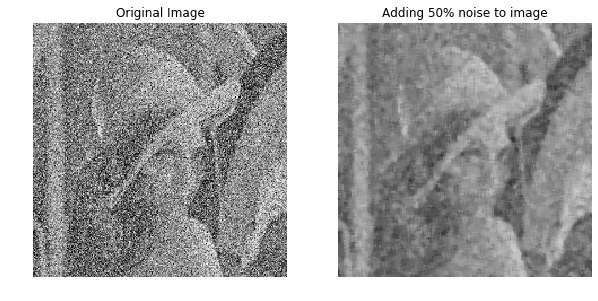

In [5]:
## Median Blurring -> computes the median of all the pixels under the kernel window and 
##                     the central pixel is replaced with this median value

## here ksize should be positive odd integer

img = cv2.imread("images/salt_and_paper_noise.jpg")

fig = plt.figure(figsize=(10,10))
ax1,ax2 = fig.subplots(1,2)

img_med_blur = cv2.medianBlur(img,ksize=5)

ax1.imshow(img)
ax2.imshow(img_med_blur)
ax1.set_title("Original Image")
ax1.axis('off')
ax2.set_title("Adding 50% noise to image")
ax2.axis('off')
plt.plot()


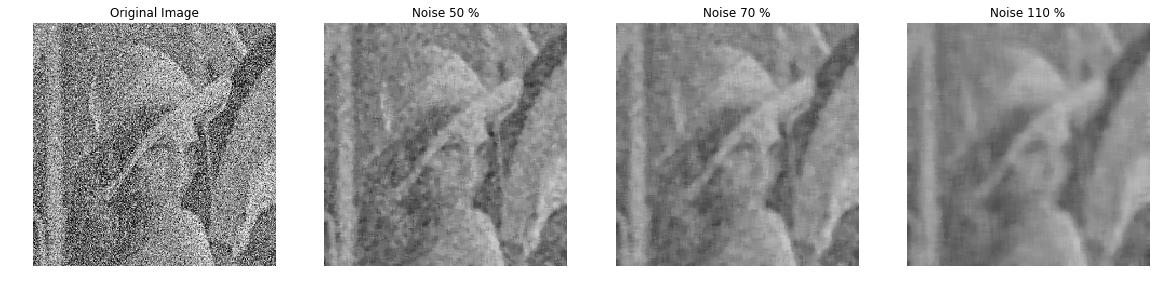

In [6]:
## lets blur image with different kernel sizes

img = cv2.imread("images/salt_and_paper_noise.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

kernels = [5,7,11]

fig ,ax = plt.subplots(nrows=1,ncols=4,figsize=(20,20))
ax[0].imshow(img)
ax[0].axis("off")
ax[0].set_title("Original Image")

for index,size in enumerate(kernels):
    img_blur = cv2.medianBlur(img,ksize=size)
    axi = ax[index+1]
    axi.imshow(img_blur)
    axi.axis('off')
    axi.set_title("Noise {} %".format(size*10))
plt.show()

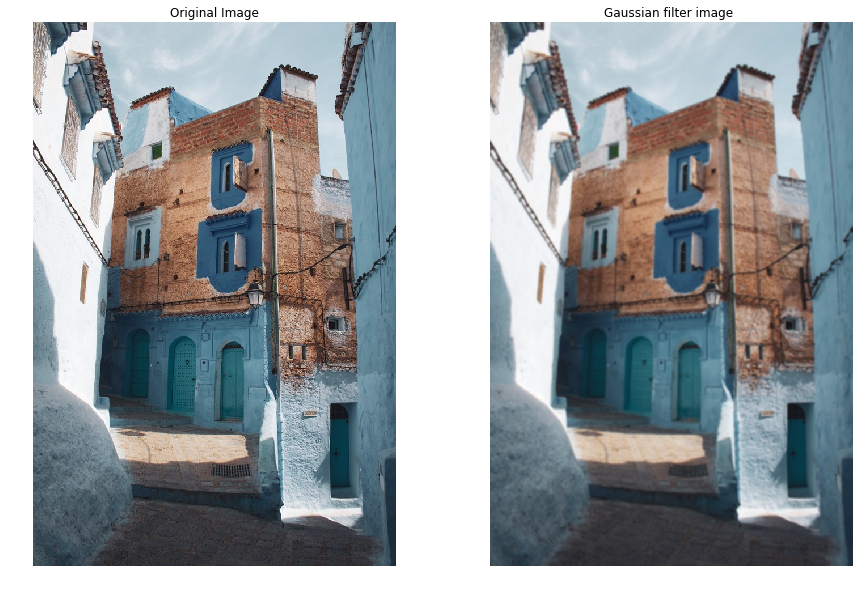

In [7]:
## Guassian Blurring -> using the kernel whose values have a Gaussian distribution.
## values are generated by a Gaussian function so it requires a sigma value for its parameter
## values of the kernel go higher near the center and go smaller near the corner
img = cv2.imread("images/image3.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

fix,ax = plt.subplots(nrows=1,ncols=2,figsize=(15,10))
ax[0].imshow(img)
ax[0].axis("off")
ax[0].set_title("Original Image")

img_blur = cv2.GaussianBlur(img,ksize = (7, 7), sigmaX = 0)
ax[1].imshow(img_blur)
ax[1].axis('off')
ax[1].set_title("Gaussian filter image ")
plt.show()

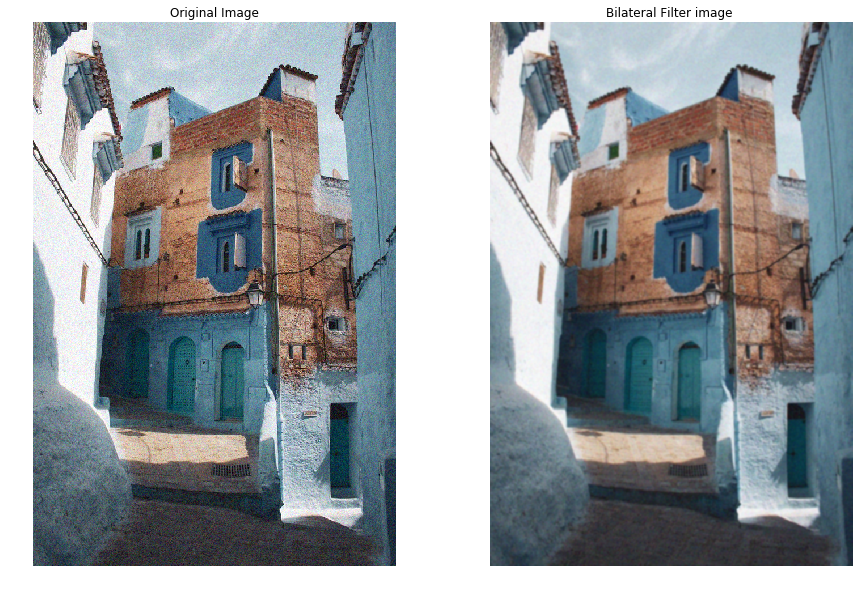

In [8]:
 ##  Testing gaussian blur with white noise 
img = cv2.imread("images/image3.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

from skimage.util import random_noise

# convert PIL Image to ndarray
im_arr = np.asarray(img)

# random_noise() method will convert image in [0, 255] to [0, 1.0],
# inherently it use np.random.normal() to create normal distribution
# and adds the generated noised back to image

noise_img = random_noise(im_arr, mode='gaussian', var=0.05**2)
noise_img = (255*noise_img).astype(np.uint8)
img = noise_img

fix,ax = plt.subplots(nrows=1,ncols=2,figsize=(15,10))
ax[0].imshow(img)
ax[0].axis("off")
ax[0].set_title("Original Image")

img_blur = cv2.GaussianBlur(img,ksize = (7, 7), sigmaX = 0)
ax[1].imshow(img_blur)
ax[1].axis('off')
ax[1].set_title("Bilateral Filter image ")
plt.show()

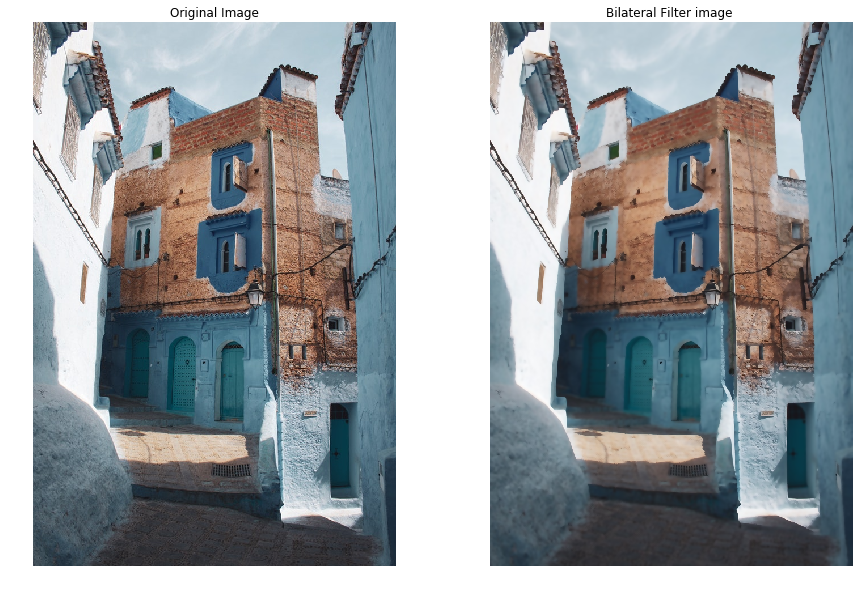

In [9]:
## Bilateral Blurring -> Blurring not only dissolve noise but also smooths out images
##                       to avoid these while dissolving noise we use Bilateral filter
##   Similar to gaussian blurring, bilateral filter also consider neighbouring pixel with weight assign to them.
## These weights have 2 components -> 
## 1.  Same weighting used by the Gaussian filter.
## 2.  Difference in intensity between the neighboring pixels and the evaluated one.

img3 = cv2.imread("images/image3.jpg")
img3 = cv2.cvtColor(img3,cv2.COLOR_BGR2RGB)

fig ,ax = plt.subplots(nrows=1,ncols=2,figsize=(15,10))
ax[0].imshow(img3)
ax[0].axis("off")
ax[0].set_title("Original Image")

## sigma-space = Standard deviation in the coordinate space
## sigma-color = Standard deviation in the color space.
img_blur = cv2.bilateralFilter(img3,7,sigmaSpace = 75, sigmaColor =75)
ax[1].imshow(img_blur)
ax[1].axis('off')
ax[1].set_title("Bilateral Filter image ")
plt.show()

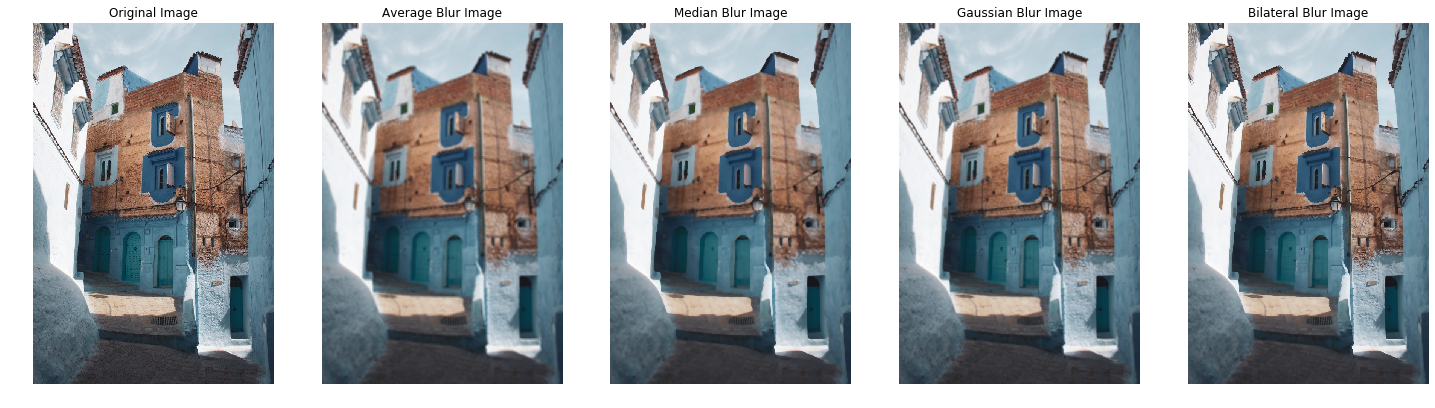

In [10]:
## LETS PUT ALL OF OUR BLUR TECHNIQUES ON ONE IMAGE

fimage = cv2.imread("images/image3.jpg")
fimage = cv2.cvtColor(fimage,cv2.COLOR_BGR2RGB)

fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(25,20))

ax[0].imshow(fimage)
ax[0].axis("off")
ax[0].set_title("Original Image")

## average blur
img_avg_blur = cv2.blur(fimage,ksize=(7,7))

ax[1].imshow(img_avg_blur)
ax[1].axis("off")
ax[1].set_title("Average Blur Image")

## median blur
img_med_blur = cv2.medianBlur(fimage,ksize=7)

ax[2].imshow(img_med_blur)
ax[2].axis("off")
ax[2].set_title("Median Blur Image")

## gaussian blur
img_gaus_blur = cv2.GaussianBlur(fimage,ksize=(7,7),sigmaX = 0)

ax[3].imshow(img_gaus_blur)
ax[3].axis("off")
ax[3].set_title("Gaussian Blur Image")

## bilateral blur 
img_bilate_blur = cv2.bilateralFilter(fimage,7,sigmaSpace=75,sigmaColor=75)

ax[4].imshow(img_bilate_blur)
ax[4].axis("off")
ax[4].set_title("Bilateral Blur Image")

plt.show()